In [4]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Fall-2023-DataViz/main/Week-8-ForceSimulator/data/data_scopus.csv")
## drop the rows with no Author Affiliations

df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [48]:
df.head()

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by,First_author_Country
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,0,0,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,0.0,Canada
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,0,0,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,0.0,Italy
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,0,0,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,0.0,Serbia
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,0,0,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,0.0,Japan
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,0,0,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,0.0,India


In [7]:
# Function to get each author's affiliated country
def getCountry(author_id):

  df_temp = df.copy()
  rowIndex = 0;

  # Iterrates through every row of the dataframe until the first occurance of the authorID that was passed is found
  for row in df_temp.iterrows():

    # Error is thrown if author is not in the row, so a try is used
    try:
      index = df_temp.iloc[rowIndex]['Author(s) ID'].split(";").index(author_id)
      country = df_temp.iloc[rowIndex]['Authors with affiliations'].split(";")[index].split(",")[-1].strip()

      # Some authors have no affiliated country (have university or initial instead). "United States" is imputed for these
      if (len(country) > 15) or (len(country) <= 2):
        country = "United States"

      return country

    except:
      # Counter to get proper row index. Only increments to next row if author was not found in current row
      rowIndex += 1
      continue

In [49]:
getCountry("53984550800")

'United States'

In [20]:
def get_first_author_affilation(x):
  try:
    return x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)

In [51]:
df['Author(s) ID'].ravel()

array(['57202536919;53984550800;57215426514;6603541102;',
       '23398572100;57191836654;',
       '57205293410;56421700900;24831175200;36195159400;6507346536;6602981892;',
       '57201502480;57171240600;35373203100;25925695500;57200282319;',
       '6505934038;57202719622;35590173900;', '14628356000;7006162997;',
       '57204951915;36656019700;8399981200;57196119394;57204952424;57213421778;',
       '57210571032;36995837100;6603639150;57208132039;57193809880;57208123780;7402264252;7401951879;57202410843;',
       '57189029589;', '57202995868;56142103500;57204058927;',
       '57201030837;57208132039;14031725600;57208123780;35291520900;57193082748;57210803755;',
       '56434720200;57207859284;25929119800;55809641900;',
       '57140618200;55537800900;57208164221;57208160887;57193387530;56520099600;39661236700;6602415651;39661131900;55205882400;7801408662;',
       '36628922400;57215455402;56651946700;55460966100;55616335800;57215430538;7102833923;',
       '57204697057;53984550800;

In [23]:
df['First_author_Country']

0             Canada
1              Italy
2             Serbia
3              Japan
4              India
           ...      
565           Canada
566    United States
567      South Korea
568    United States
569           Canada
Name: First_author_Country, Length: 561, dtype: object

In [31]:
df.head()

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by,First_author_Country
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,0,0,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,0.0,Canada
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,0,0,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,0.0,Italy
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,0,0,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,0.0,Serbia
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,0,0,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,0.0,Japan
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,0,0,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,0.0,India


In [57]:
df['Cited by'].value_counts()

0.0      176
1.0       41
2.0       39
3.0       25
4.0       23
        ... 
69.0       1
91.0       1
86.0       1
194.0      1
191.0      1
Name: Cited by, Length: 90, dtype: int64

<AxesSubplot:>

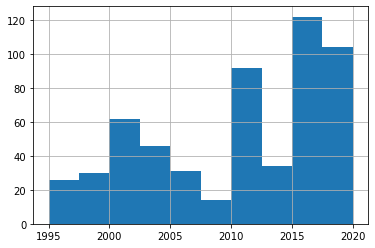

In [25]:
df.Year.hist()

In [26]:
df["Source title"].value_counts().reset_index()

,index,Source title
0,Proc. of the IADIS Int. Conf. Computer Graphic...,55
1,MCCSIS 2018 - Multi Conference on Computer Sci...,53
2,Proceedings of the International Conferences o...,49
3,Proceedings of the IEEE Visualization Conference,48
4,Proceedings of the IEEE Symposium on Informati...,41
5,Lecture Notes in Artificial Intelligence (Subs...,35
6,International Multidisciplinary Scientific Geo...,32
7,Proceedings of the ACM Symposium on Applied Co...,32
8,International Journal of Human Computer Studies,29
9,IS and T International Symposium on Electronic...,25


In [27]:
nodes = df['EID'].values
df = df.fillna(0)

In [29]:
df['Year'].min()

1995

In [28]:
df['Year'].max()

2020

In [30]:
G = nx.Graph()

In [58]:
nodes = []
for row in df.iterrows():
  nodes.append((row[1]['EID'],{
      "Title": row[1]['Title'],
      "Year" : row[1]['Year'],
      "Citations" : row[1]['Cited by'],
      "Country" : row[1]['First_author_Country'],
  }))

In [33]:
len(nodes)

561

In [34]:
nodes[0]

('2-s2.0-85086464158',
 {'Title': 'Virtual reality applications for the built environment: Research trends and opportunities',
  'Year': 2020,
  'Citations': 0.0,
  'Publisher': 'Elsevier B.V.'})

In [60]:
G.add_nodes_from(nodes)

In [61]:
edges = []
for row in df.iterrows():
  current_paper = row[1]['EID']
  if ";" in row[1]['Author(s) ID']:
    authors = row[1]['Author(s) ID'][:-1].split(";")
    for author in authors:
      papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
      if len(papers)>0:
        for paper in papers:
          if paper != current_paper:
            edges.append((current_paper,paper))
  else:
    continue

In [62]:
edges

[('2-s2.0-85086464158', '2-s2.0-85060755230'),
 ('2-s2.0-85086464158', '2-s2.0-85060755230'),
 ('2-s2.0-85082875828', '2-s2.0-84971592065'),
 ('2-s2.0-85078194587', '2-s2.0-72949105789'),
 ('2-s2.0-85075706132', '2-s2.0-84863589228'),
 ('2-s2.0-85074886243', '2-s2.0-78649323301'),
 ('2-s2.0-85074886243', '2-s2.0-78649323301'),
 ('2-s2.0-85071686342', '2-s2.0-84897450439'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85070952871', '2-s2.0-85063859157'),
 ('2-s2.0-85070952871', '2-s2.0-85063859157'),
 ('2-s2.0-85071875225', '2-s2.0-85073324217'),
 ('2-s2.0-85066064473', '2-s2.0-77955088235'),
 ('2-s2.0-85063859157', '2-s2.0-85070952871'),
 ('2-s2.0-850

In [63]:
G.add_edges_from(edges)

In [64]:
pos = nx.drawing.circular_layout(G)
#pos = nx.spring_layout(G)

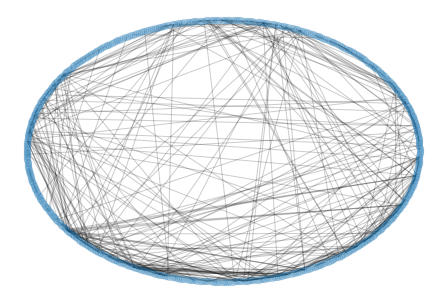

In [65]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [66]:
from networkx.readwrite import json_graph

In [67]:
with open("publication_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

In [68]:
nx.write_gml(G,"network.gml")